[0.00351264 0.00225179 0.00145795 0.00101621 0.00082602 0.00080122
 0.00087002 0.00097501 0.00107317 0.00113584 0.00114874 0.00111199
 0.00104007 0.00096183 0.00092053 0.00097378 0.00119358 0.0016663
 0.0024927  0.00378792]


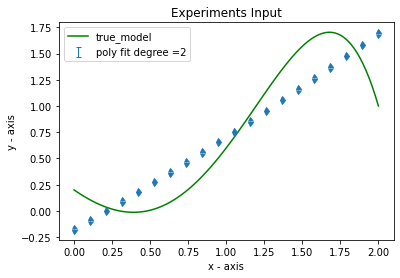

[0.00925994 0.00626789 0.00467327 0.00473564 0.00333551 0.00367983
 0.00381574 0.00366229 0.00386476 0.00318978 0.00272801 0.00382389
 0.00439052 0.00401607 0.00436214 0.00372425 0.00407765 0.00551416
 0.00742404 0.0101354 ]


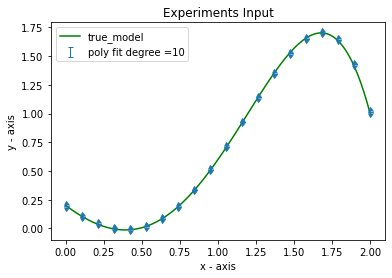

In [119]:
#  Assignment 1 - ii - Least Squares Regression

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np

def get_y_train(t0, t1, t2, t3, t4, t5, mu, sigma, N, x):

  noise = np.random.normal(mu,sigma, size=(N,))
  y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise

  return (y)

def get_y_est(poly_deg, x_train, y_train, N):

  Q_train = np.zeros(shape = (N,poly_deg+1))
  Q_train[:, -1] = 1

  for i in range(1,poly_deg+1):
    Q_train[:,i-1] = np.power(x_train,i)

  # print("X")
  # print(Q_train)
  # print("\n")

  theta = np.linalg.pinv(Q_train.T.dot(Q_train)).dot(Q_train.T).dot(y_train)
  y_est = Q_train.dot(theta)
  # print("Theta's")
  # print(theta)
  # print("\n")

  # print("y_est")
  # print(y_est)
  # print("\n")
  return (y_est)

#
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#data range
r_start = 0
r_end = 2
points  = 20
experiments = 100
x_train = np.linspace(r_start, r_end, num= points)

# print("x_train")
# print(x_train)
# print("\n")
def plot_pol_est_result(pol_deg):
  experiment_values = [] 
  for i in range(0,experiments):
    y_train = get_y_train(th0, th1, th2, th3, 0, th5, 0, 0.1, points, x_train)
    # print("y_train")
    # print(y_train)
    # print("\n")
    experiment_values.append(get_y_est(pol_deg, x_train, y_train, points))

  ##### Expected Value
  E_Y = np.zeros(20)
  for i in range(0, len(experiment_values)):
    E_Y = E_Y + experiment_values[i]

  E_Y = E_Y / experiments

  ##### Variance
  var_Y = np.zeros(20)
  for i in range(0, len(experiment_values)):
    var_Y = var_Y + (experiment_values[i] - E_Y)**2

  var_Y = var_Y / experiments
  print(var_Y)
  # plt.plot(x_train, y_train, marker='o',linewidth=0, label = 'experiment', ) 
  x_true = np.linspace(0, 2, 100)
  y_true = th5*x_true**5 + th3*x_true**3 + th2*x_true**2 + th1*x_true + th0

  plt.plot(x_true, y_true, '-g', label= 'true_model')
  #plt.plot(x_train, E_Y, marker= 'o', linewidth=0, label='poly fit degree =' + str(pol_deg))

  plt.errorbar(x_train, E_Y, uplims=True, lolims=True, yerr= var_Y, linewidth=0, elinewidth = 1, capsize = 2.5, label='poly fit degree =' + str(pol_deg))

  # naming the x axis 
  plt.xlabel('x - axis') 
  # naming the y axis 
  plt.ylabel('y - axis') 

  # giving a title to my graph 
  plt.title('Experiments Input') 

  # function to show the plot 
  plt.legend()

  plt.show()

plot_pol_est_result(2)
plot_pol_est_result(10)